In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("notebook")

DATA_DIR = 'data'

#### Get the data from csv files that are produced by the python scripts we run on the cluster

In [53]:
# load the mean tone a country has about itself
country_to_country_view = pd.read_csv(os.path.join(DATA_DIR, 'country_to_country_view.csv')).dropna()  # 3 rows have no mention_country
country_inner_view = pd.read_csv(os.path.join(DATA_DIR, 'country_inner_view.csv'))
country_outer_view = pd.read_csv(os.path.join(DATA_DIR, 'country_outer_view.csv'))
country_to_type_view = pd.read_csv(os.path.join(DATA_DIR, 'country_to_country_type_view.csv'))
media_to_country_view = pd.read_csv(os.path.join(DATA_DIR, 'media_to_country_view.csv.zip'))

These files contains the same statistical informations for several use cases (what a country thinks of another, difference between types of actors from a country, difference from news sources from a country, ...). The statistical info we chose to extract from the data is always the same, namely:
    - avg_tone: the average tone used by the mentions that corresponds to the row
    - stddev_tone: standard deviation of the average tone
    - count_mentions: number of mentions in the row
    - count_events: number of distinct events in the row (if there are 10 mentions to the same event, count_mentions=10 and count_events=1)
    - avg_conf: average confidence of GDELT into the informations it parsed
    - avg_weighted_tone: average tone weighted by the confidence of GDELT (avg(Tone*Confidence)/avg_conf)
    - std_weighted_tone: std of the weighted tone (std(Tone*Confidence)/avg_conf)
    - first_quartile_tone: first quartile of the tone
    - median_tone: median of the tone
    - third_quartile_tone: third quartile of the tone

In [3]:
# statistical informations about the tone of the news of a country towards another
country_to_country_view.head()

,actor_country,mention_country,avg_tone,stddev_tone,count_mentions,count_events,avg_conf,avg_weighted_tone,std_weighted_tone,first_quartile_tone,median_tone,third_quartile_tone
0,Afghanistan,Botswana,-1.942005,3.236105,15,15,43.333333,-1.981697,5.082414,-3.574975,-1.971522,-0.603865
1,Albania,Jersey,-5.202312,0.000000,2,2,100.000000,-5.202312,0.000000,-5.202312,-5.202312,-5.202312
2,Albania,Kenya,-2.902415,2.918567,98,54,41.428571,-2.822658,4.137127,-5.345502,-1.954397,-0.400534
3,Antigua and Barbuda,Armenia,-7.448764,3.566137,10,6,49.000000,-7.776772,4.736934,-10.194175,-10.194175,-3.921569
4,Antigua and Barbuda,Russia,-1.930421,3.658752,81,79,45.679012,-2.430936,5.551305,-2.910855,-1.479915,0.000000


In [4]:
# statistical informations about the tone of the news of a country towards itself
country_inner_view.head()

,country,avg_tone,std_tone,count_mentions,count_events,avg_conf,avg_weighted_tone,std_weighted_tone,first_quartile_tone,median_tone,third_quartile_tone
0,Yemen,-3.608844,3.585294,10106,8795,44.735801,-3.732185,5.313685,-5.907173,-3.703704,-1.476015
1,Guyana,-2.180227,3.886347,54161,48270,42.249958,-1.987313,4.733579,-4.572565,-1.884701,0.412088
2,Malaysia,-1.757954,3.398342,604138,397239,46.975228,-1.666103,4.283756,-3.859649,-1.646091,0.540541
3,Singapore,-1.133022,3.766699,175191,81500,53.444127,-1.091853,4.470803,-3.529412,-0.784314,1.450677
4,Iraq,-3.648960,3.098804,108114,72500,40.784357,-3.835942,5.053808,-5.543307,-3.500761,-1.586561


In [5]:
# statistical informations about the tone of the news of the external world towards a country
country_outer_view.head()

,country,avg_tone,std_tone,count_mentions,count_events,avg_conf,avg_weighted_tone,std_weighted_tone,first_quartile_tone,median_tone,third_quartile_tone
102,Puerto Rico,-1.931021,3.918320,22,16,60.909091,-1.470592,3.636438,-2.689873,-1.583113,0.355240
109,Wallis and Futuna Islands,0.210127,2.884595,144,115,50.902778,-0.192664,3.801416,-1.923077,0.310559,2.484472
56,Saint Helena,-0.400626,2.502714,2768,943,45.650289,-0.487017,3.276981,-1.480750,-0.379747,0.829876
119,San Marino,-1.101589,3.642579,3015,1588,39.489221,-1.067121,4.634625,-3.133159,-1.250000,1.125402
106,Andorra,-1.659493,3.480685,3118,1735,39.281591,-1.497628,4.495374,-3.712871,-2.183406,0.516796


In [6]:
# statistical informations about the tone of the news of a country towards the type (government,
# buisnesses,...) of another country
country_to_type_view.head()

,actor_country,mention_country,actor_type,avg_tone,stddev_tone,count_mentions,count_events,avg_conf,avg_weighted_tone,std_weighted_tone,first_quartile_tone,median_tone,third_quartile_tone
0,Afghanistan,Barbados,GOV,-6.736422,3.256033,16,16,36.875000,-6.656401,6.535354,-9.271523,-9.233792,-4.612546
1,Afghanistan,China,RAD,-2.611754,1.093688,9,5,45.555556,-2.327217,1.537660,-2.247191,-2.247191,-2.247191
2,Afghanistan,Gambia,INS,-4.517831,1.231363,3,3,46.666667,-4.619392,3.767840,-5.228758,-5.228758,-3.095975
3,Afghanistan,North Korea,INS,-5.960580,3.075897,49,49,46.122449,-5.637655,4.869529,-6.572165,-6.571429,-4.852071
4,Afghanistan,Poland,UAF,2.640371,1.299043,7,2,51.428571,2.616605,1.548303,0.985222,3.050847,4.081633


In [7]:
# statistical informations about the tone of the news from a media (website) towards a country
media_to_country_view.head()

,actor_country,source_country,source_name,avg_tone,stddev_tone,count_mentions,count_events,avg_conf,avg_weighted_tone,std_weighted_tone,first_quartile_tone,median_tone,third_quartile_tone
0,Afghanistan,Australia,governmentnews.com.au,-1.318458,0.000000,1,1,50.000000,-1.318458,0.000000,-1.318458,-1.318458,-1.318458
1,Afghanistan,Austria,ots.at,5.314010,0.000000,6,6,16.666667,5.314010,3.292971,5.314010,5.314010,5.314010
2,Afghanistan,Benin,bittenus.com,1.765772,1.521576,11,10,50.909091,2.035957,1.765785,2.008032,2.012349,2.230971
3,Afghanistan,Canada,dailyheraldtribune.com,-4.650001,3.254665,13,13,54.615385,-4.562309,5.953714,-6.433824,-6.433824,-4.444444
4,Afghanistan,Canada,infotel.ca,-4.742726,3.513820,1963,1900,37.677025,-4.854639,5.871267,-6.726457,-4.341534,-2.343750


#### What statistic to use
We can see from the following plots that the average confidence for the dataframes country_inner_view and country_outer_view vary quite a bit (even tough these are the largest dataset) weighting the tone by the confidence thus makes sense. We should however be cautious with that parameter since it lowers the importance of news that have a low confidence which might lead to bias (ex: most journals in Afghanistan are in afghan except for a few pro-american websites that are in english), due to the language used, the english website news have a much more confidence than the others and thus, Afghanistan seem to dislike the US less than it does in reality). This does not mean that weighting w.r.t. avg_confindence is a bad thing but that it should not be forgotten when analizing results.

The quartiles have the advantage of being robust to outliers but are harder to combine (we cannot get the median tone of the outer_view of Syria from the median tones of the view of every country towards Syria) whereas it's easy for mean and feasible for std.

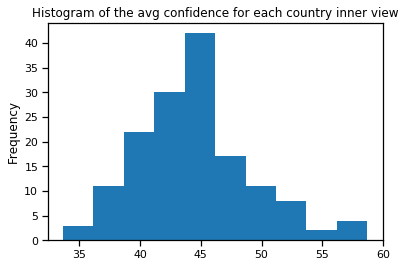

In [24]:
country_inner_view.avg_conf.plot(kind="hist", 
                        title="Histogram of the avg confidence for each country inner view");

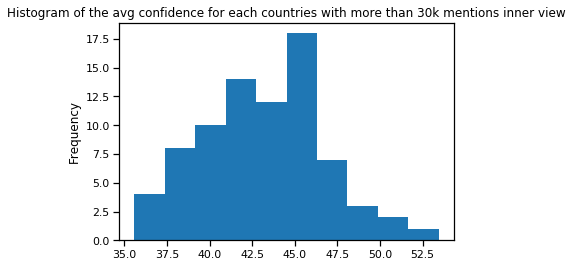

In [25]:
country_inner_view[country_inner_view.count_mentions > 30000].avg_conf.plot(kind="hist",
title="Histogram of the avg confidence for each countries with more than 30k mentions inner view");

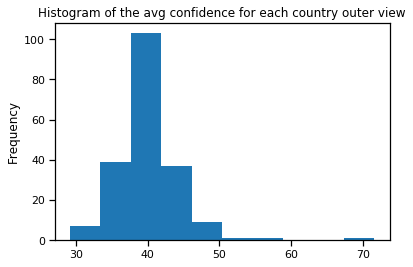

In [26]:
country_outer_view.avg_conf.plot(kind="hist",
                    title="Histogram of the avg confidence for each country outer view");


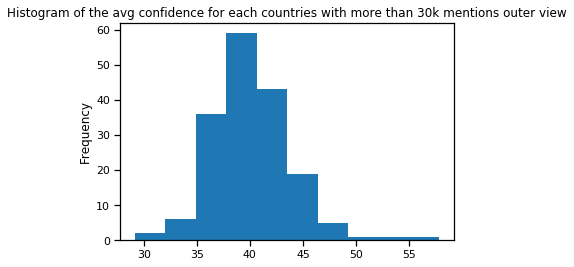

In [28]:
country_outer_view[country_outer_view.count_mentions > 30000].avg_conf.plot(kind="hist",
title="Histogram of the avg confidence for each countries with more than 30k mentions outer view");

#### What about confidence intervals?
A very important thing when dealing with data is to assess its reliability, for example through confidence intervals. Unfortunately, in our case, we do not have the ressources to compute non parametric confidence intervals (for example trough bootstrap resampling). A solution would be to use parametric estimation, assuming the tone is normally distributed. By using the mean, std and quartiles of the tone, we can get a metric expressing how much the data is normally distributed. If we standardize the tone by mean and std, the median tone should be 0 and the 1st and 3rd quartiles -0.6745 and 0.6745, computing the MSE between these data and what they should be give us an estimate on the "normality" of the curve. Please note that this metric is very approximate since we only use three points and that there are also errors coming from the computation by spark of the median and quantiles themselves since spark only approximates them. We can however note two things from the following scatterplots:
    - the metric improves with the number of mentions (altough not that much)
    - more importantly, the errors are *huge*, since we are plotting the MSE w.r.t. to values of 0 and +- 0.6745, a MSE of 0.2 is very bad.
Using normal parametrization is thus not reliable either.

In [66]:
def add_sqrt_MSE_with_gaussian_quartiles(df):
    """
    assuming the tone is distributed as a gaussian, the normalized quartiles and 
    median should be approximately equal to the ones of a gaussian distribution 
    (Q1(gaussian) = -0.6745, Q2(gaussian) = 0, Q3(gaussian) = 0.6745).
    
    For rows with a number of mentions of 1, this will return NaN
    """
    q1_squared_error = ((df.first_quartile_tone - df.avg_tone) / df.std_tone + 0.6745)**2
    median_squared_error = ((df.median_tone - df.avg_tone) / df.std_tone)**2
    q3_squared_error = ((df.third_quartile_tone - df.avg_tone) / df.std_tone - 0.6745)**2
    df["sqrt_gaussian_quartile_MSE"] = (q1_squared_error + median_squared_error
                                        + q3_squared_error)**0.5
    return df

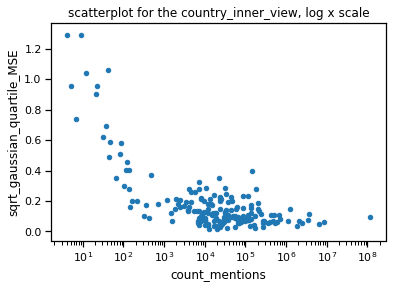

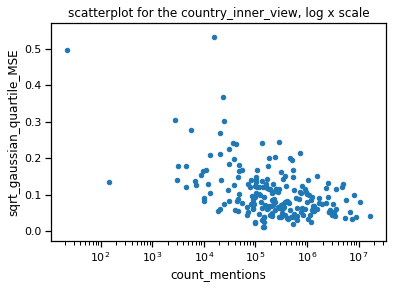

In [86]:
country_inner_view = add_sqrt_MSE_with_gaussian_quartiles(country_inner_view)
country_inner_view.plot(kind='scatter', x="count_mentions", y="sqrt_gaussian_quartile_MSE",
                       title="scatterplot for the country_inner_view, logarithmic x scale",
                       logx=True)

country_outer_view = add_sqrt_MSE_with_gaussian_quartiles(country_outer_view)
country_outer_view.plot(kind='scatter', x="count_mentions", y="sqrt_gaussian_quartile_MSE",
                       title="scatterplot for the country_outer_view, logarithmic x scale",
                       logx=True);

#### Partial data analisys to see if results seem plausible

In [ ]:
#TODO: on peut parler de l'inde vs pakistan comme il disait,
# rajouter le code qui choppe les données dont parle christope

The avg_tone is between - 3.989916 and 0.999933, the mean is -0.01877.
21019 rows have an avg_tone negative but only 6525 rows have an avg_tone positive.
We can said that country have a tendency to speak negatively about an other country.

If we focus on outliers we can see that for example Macau talk very positively about China , but this is because there is a lot of Chinese media (nine Chinese daily newspapers for exemple).
On the other hand, we can see that United States is the country the most quoted negatively

#### Compares inner and outer view in a scatterplot. 
We could refine the following scatterplot by showing how to divide it into several countries, comment the results, ...

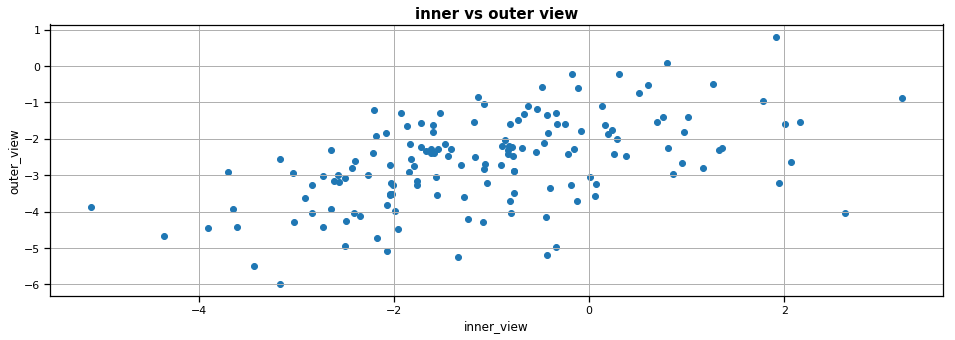

In [8]:
# comparing inner and outer view
country_inner_view = country_inner_view[country_inner_view["count_events"] > 1000]
country_outer_view = country_outer_view[country_outer_view["count_events"] > 1000]
inner_outer_view = country_inner_view.merge(country_outer_view, left_on="country", 
                                            right_on="country", suffixes=("_in", "_out"))
fig, ax = plt.subplots(figsize=(16,5))
ax.scatter(x='avg_tone_in', y='avg_tone_out', data=inner_outer_view)
ax.set_title("inner vs outer view", fontsize=15, fontweight='bold')
ax.set_ylabel('outer_view')
ax.set_xlabel('inner_view')
ax.grid(True)

#### Separation into actor type and news source, example with the USA
We use here the USA as an example of hat could be done with the country_to_type_view and media_to_country_view dataframes

In [ ]:
#TODO: faire des petits plots avec les variations des types aux usa + ce que les différents news websites pensant de la russie

#### Uses the score of a country to weight the tone its news uses when talking about another country
(this is not really part of the deadline but is an early implementation of an idea to exploit the data)

In [9]:
# iteratively decreasing the weight of a country with bad reputation to compute the reputation
# of another country
c_to_c_transition = country_to_country_view[["actor_country", "mention_country", "avg_tone", 
                                              "count_mentions", "avg_weighted_tone"]]
# other columns cannot be splitted from country to country

c_to_c_transition = c_to_c_transition[c_to_c_transition.actor_country !=
                                             c_to_c_transition.mention_country]


# get the count of articles for each actor_country and weight avg_tone and avg_weighted_tone by 
# this, i.e. avg_tone = avg_tone * count / (sum count for actor_country)
counts = c_to_c_transition.groupby("actor_country")["count_mentions"].agg("sum")
c_to_c_transition = c_to_c_transition.merge(counts.to_frame(), left_on="actor_country",
                                            right_on="actor_country")
c_to_c_transition.avg_tone = c_to_c_transition.avg_tone * c_to_c_transition.count_mentions_x / \
                            c_to_c_transition.count_mentions_y
c_to_c_transition.avg_weighted_tone = c_to_c_transition.avg_weighted_tone * \
                    c_to_c_transition.count_mentions_x / c_to_c_transition.count_mentions_y
c_to_c_transition = c_to_c_transition.drop(["count_mentions_x", "count_mentions_y"], axis=1)


# putting the country to country transitions in the form of a np matrix that will be more
# suitable for multiplication, we then look at real eigenvalues
index_to_country = np.unique(country_to_country_view.actor_country.values)
country_to_index = {country: index for index, country in enumerate(index_to_country)}

transition_matrix = np.zeros((index_to_country.shape[0], index_to_country.shape[0]))
for row in c_to_c_transition.itertuples(index=False):
    if row.mention_country in country_to_index:  # we do not take the country that don't have
        # mentions from other countries into account
        transition_matrix[country_to_index[row.actor_country],
                      country_to_index[row.mention_country]] = row.avg_tone

eig_val, eig_vec = np.linalg.eig(transition_matrix)
eig_vec = eig_vec[np.isreal(eig_val), :]
eig_vec = eig_vec[np.sum(np.isreal(eig_vec), 1) == 0, :]

#### Goals for next milestone
    - interpret inner and outer view scatterplot (maybe relate these with PIB, continent, wether the country is seen as a democracy by the occidental world,...)
    - trying to sort countries in different clusters
    -
    - once we have decided what to keep, what to say and how to order it, designing the data story (animations, beautiful plots on javascripts)
TODO: complete, detail